In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features


random_state_for_sites = {'Foliage':30, 'Carp':20, 'Central':50, 'Telephone':60}
color_for_groups = {0: 'blue', 1: 'red', 2:'limegreen'}
label_for_groups = {0: 'LF1', 1: 'HF1', 2:'HF2'}

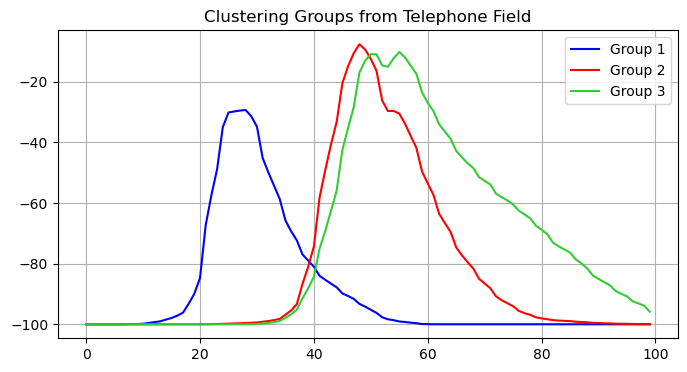

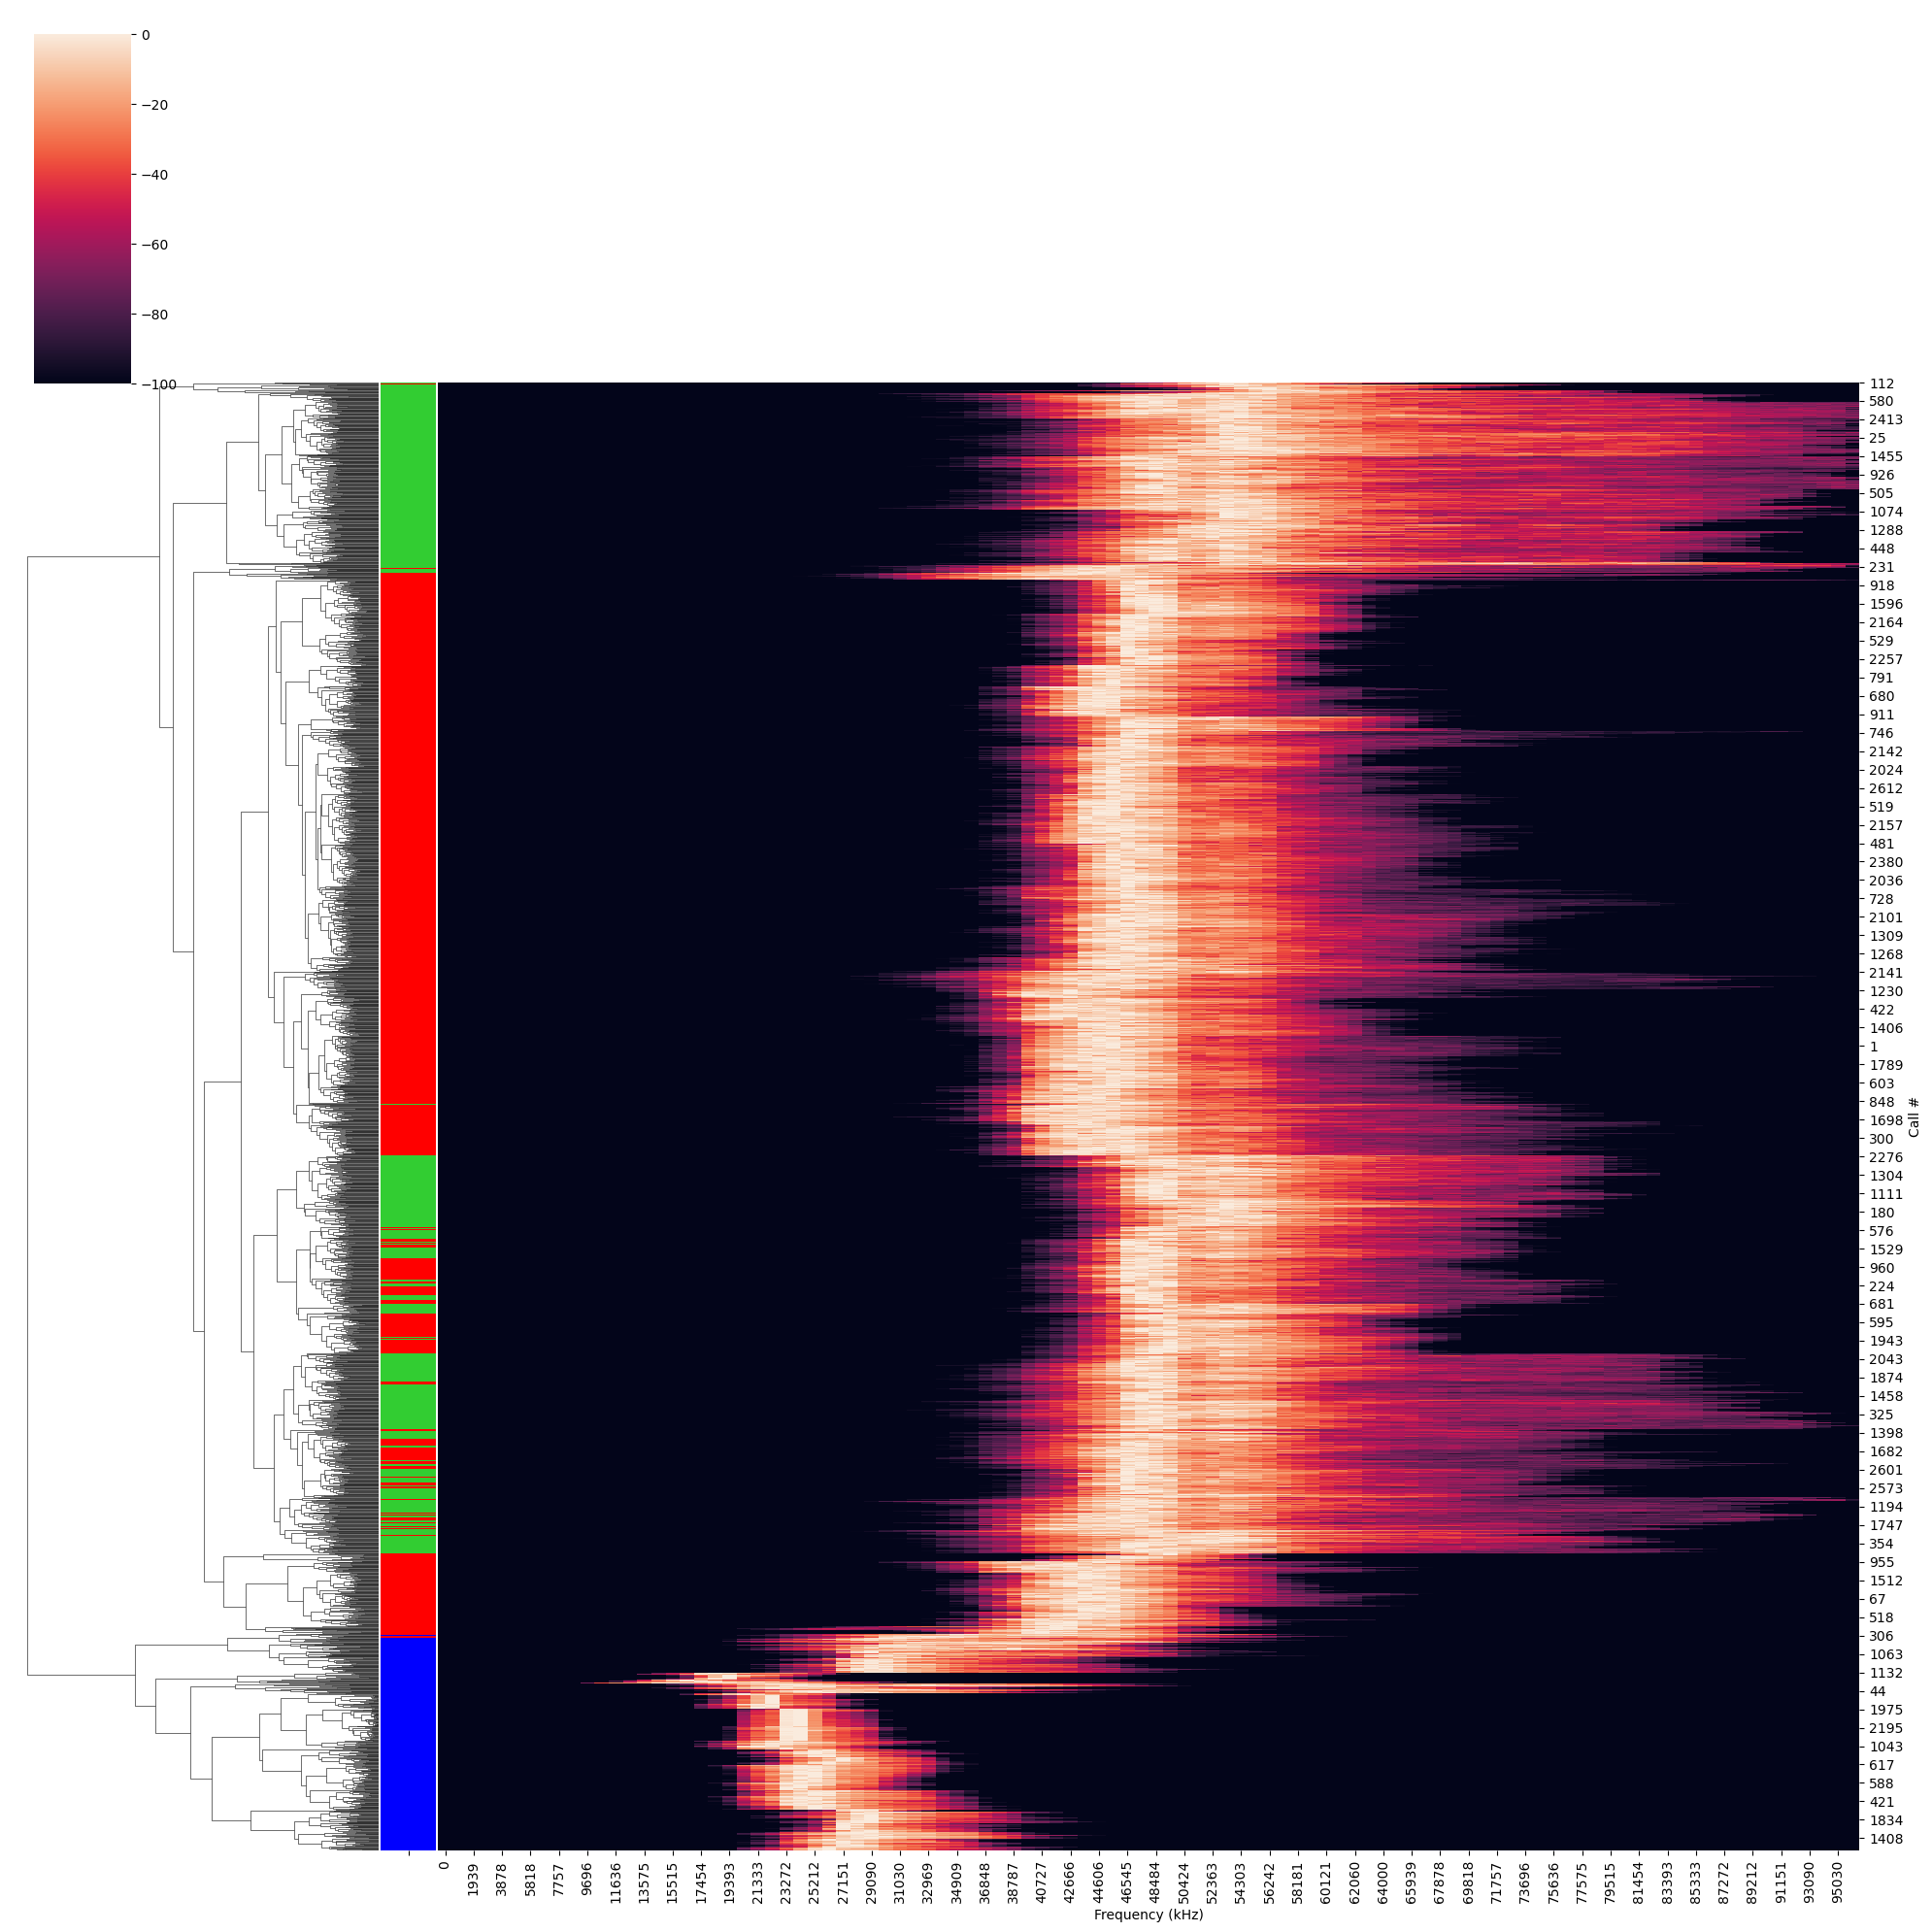

In [4]:
site_key = 'Telephone'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)

welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'

k = 3
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=60).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]}')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 20), col_cluster=False, row_colors=groups_to_colors)

In [8]:
site_key = 'Telephone'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top100_infile_call_signals.npy', allow_pickle=True)
location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top100_infile_call_signals.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)

welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data

Frequency (kHz),0,969,1939,2909,3878,4848,5818,6787,7757,8727,...,87272,88242,89212,90181,91151,92121,93090,94060,95030,96000
Call #,,,,,,,,,,,,,,,,,,,,,
0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990435,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
990436,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
990437,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [7]:
kmean_welch.predict(welch_data)

array([1, 1, 1, ..., 1, 2, 0], dtype=int32)

In [12]:
test = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_inbouts_call_signals.csv', index_col=0, low_memory=False)
test

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate
0,0,0,10,20220723_040000.WAV,Telephone Field,22.878862,250000
1,0,0,10,20220723_043000.WAV,Telephone Field,28.016322,250000
2,0,1,10,20220723_043000.WAV,Telephone Field,22.021590,250000
3,0,2,10,20220723_043000.WAV,Telephone Field,18.003869,250000
4,0,3,10,20220723_043000.WAV,Telephone Field,17.374274,250000
...,...,...,...,...,...,...,...
47109,0,45,7,20221017_133000.WAV,Telephone Field,24.502263,192000
47110,0,46,7,20221017_133000.WAV,Telephone Field,8.592850,192000
47111,0,47,7,20221017_133000.WAV,Telephone Field,9.164494,192000
47112,0,48,7,20221017_133000.WAV,Telephone Field,13.295326,192000


In [13]:
test[test['file_name']=='20220723_043000.WAV']

,index,bout_index,SD_card,file_name,site,SNR,sampling_rate
1,0,0,10,20220723_043000.WAV,Telephone Field,28.016322,250000
2,0,1,10,20220723_043000.WAV,Telephone Field,22.021590,250000
3,0,2,10,20220723_043000.WAV,Telephone Field,18.003869,250000
4,0,3,10,20220723_043000.WAV,Telephone Field,17.374274,250000
5,0,4,10,20220723_043000.WAV,Telephone Field,5.856354,250000
...,...,...,...,...,...,...,...
81,0,75,10,20220723_043000.WAV,Telephone Field,15.856814,250000
82,0,76,10,20220723_043000.WAV,Telephone Field,28.611546,250000
83,0,77,10,20220723_043000.WAV,Telephone Field,11.988682,250000
84,0,78,10,20220723_043000.WAV,Telephone Field,16.374828,250000
